In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list_data(). In order to access a specific data
set, import a CPTAC subfolder using either 'import CPTAC.Dataset' or
'from CPTAC import Dataset'.
******
Version: 0.3.1
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [3]:
proteomics = en.get_proteomics()
transcriptomics = en.get_transcriptomics()

In [6]:
A1BG_cross = en.compare_omics(omics_df1=proteomics, 
                              omics_df2=transcriptomics, 
                              cols1='A1BG', cols2='A1BG')
A1BG_cross.head()`

idx,A1BG_proteomics,A1BG_transcriptomics
S001,-1.180,4.02
S002,-0.685,4.81
S003,-0.528,6.24
S005,-1.670,5.31
S006,-0.374,9.84


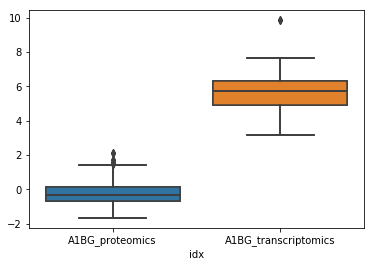

In [9]:
sns.boxplot(data=A1BG_cross)
plt.show()

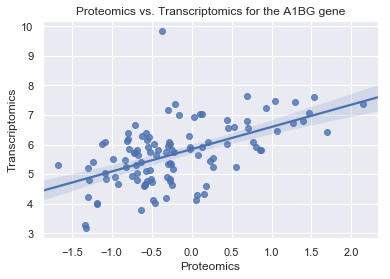

In [10]:
sns.set(style='darkgrid')
plot = sns.regplot(x=A1BG_cross.columns[0], y=A1BG_cross.columns[1],
                  data=A1BG_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics',
        title='Proteomics vs. Transcriptomics for the A1BG gene')
plt.show()

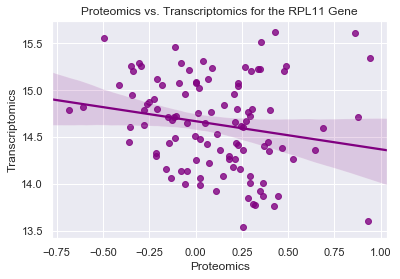

In [14]:
gene = 'RPL11'
gene_cross = en.compare_omics(omics_df1=proteomics, 
                              omics_df2=transcriptomics, 
                              cols1=gene, cols2=gene)
plot = sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1], 
                   data=gene_cross, color='purple')
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', 
         title='Proteomics vs. Transcriptomics for the RPL11 Gene')
plt.show()

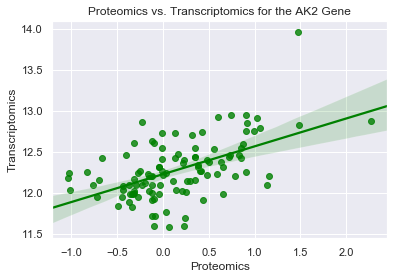

In [33]:
gene = 'AK2'
gene_cross = en.compare_omics(omics_df1=proteomics, 
                              omics_df2=transcriptomics,
                              cols1=gene, cols2=gene)
plot=sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1],
                 data=gene_cross, color='green')
plot.set(xlabel='Proteomics', ylabel='Transcriptomics',
         title='Proteomics vs. Transcriptomics for the AK2 Gene')
plt.show()

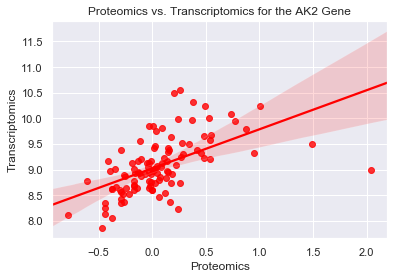

In [39]:
gene = 'DOK1'
gene_cross = en.compare_omics(omics_df1=proteomics, 
                              omics_df2=transcriptomics,
                              cols1=gene, cols2=gene)
plot=sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1],
                 data=gene_cross, color='red')
plot.set(xlabel='Proteomics', ylabel='Transcriptomics',
         title='Proteomics vs. Transcriptomics for the AK2 Gene')
plt.show()

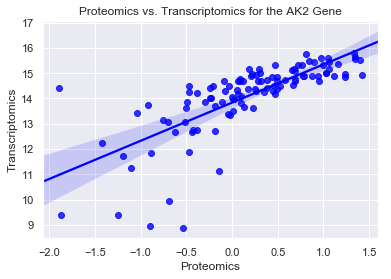

In [40]:
gene = 'EHF'
gene_cross = en.compare_omics(omics_df1=proteomics, 
                              omics_df2=transcriptomics,
                              cols1=gene, cols2=gene)
plot=sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1],
                 data=gene_cross, color='blue')
plot.set(xlabel='Proteomics', ylabel='Transcriptomics',
         title='Proteomics vs. Transcriptomics for the AK2 Gene')
plt.show()

In [42]:
!pip install statsmodels

In [43]:
#Attempt at regression model, and failed, but that's ok :)
import statsmodels.formula.api as smf
weights = np.polyfit(proteomics, transcriptomics, 3)
model = np.poly1d(weights)
results = smf.ols(formula='transcriptomics ~ model(proteomics)', 
                  data=gene_cross).fit()
results.summary()

ModuleNotFoundError: No module named 'patsy'

In [17]:
'''
For whatever reason, Ovarian is having issues

import CPTAC.Ovarian as ov

ovarian_proteomics = ov.get_proteomics()
ovarian_transcriptomics = ov.get_transcriptomics()

ovarian_cross = ov.compare_omics(omics_df1=ovarian_proteomics, 
                                 omics_df2=ovarian_transcriptomics, 
                                 cols1='PTEN', cols2='PTEN')

sns.set(style="darkgrid")
plot = sns.regplot(x=ovarian_cross.columns[0], 
                   y=ovarian_cross.columns[1], 
                   data=ovarian_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', 
         title='Proteomics vs. Transcriptomics for the PTEN gene')
plt.show()
'''

'\nFor whatever reason, Ovarian is having issues\n\nimport CPTAC.Ovarian as ov\n\novarian_proteomics = ov.get_proteomics()\novarian_transcriptomics = ov.get_transcriptomics()\n\novarian_cross = ov.compare_omics(omics_df1=ovarian_proteomics, \n                                 omics_df2=ovarian_transcriptomics, \n                                 cols1=\'PTEN\', cols2=\'PTEN\')\n\nsns.set(style="darkgrid")\nplot = sns.regplot(x=ovarian_cross.columns[0], \n                   y=ovarian_cross.columns[1], \n                   data=ovarian_cross)\nplot.set(xlabel=\'Proteomics\', ylabel=\'Transcriptomics\', \n         title=\'Proteomics vs. Transcriptomics for the PTEN gene\')\nplt.show()\n'

In [20]:
'''
Same problem with Colon

import CPTAC.Colon as co

colon_proteomics = co.get_proteomics()
colon_transcriptomics = co.get_transcriptomics()

colon_cross = co.compare_omics(omics_df1=colon_proteomics, omics_df2=colon_transcriptomics, cols1="SOX9", cols2="SOX9")

sns.set(style="darkgrid")
plot = sns.regplot(x=colon_cross.columns[0], y=colon_cross.columns[1], data=colon_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the SOX9 gene')
plt.show()
'''